In [69]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from dmpling.dmp import DMP

## Load data of path points on a 2D plane

In [70]:
data = np.load('../assets/number2.npy')

path1 = data[:, 0]
path2 = data[:, 1]
n = path1.shape[0]

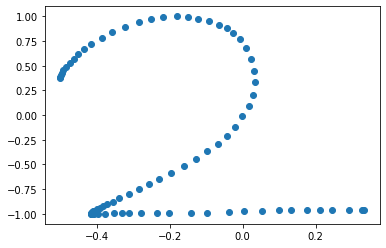

In [71]:
plt.figure()
plt.scatter(path1, path2)
plt.show()

## Since data is 2D, we need 2 DMPs

In [72]:
# define dmps
dt = 1e-2
T = n * dt
a = 10
b = a / 4
n_bfs = 100

path1[-1] = 0.5
path2[-1] = -0.5
print(path1)

dmp1 = DMP(T, dt, n_bfs=n_bfs, a=a, b=b)
dmp1.fit(path1)

dmp2 = DMP(T, dt, n_bfs=n_bfs, a=a, b=b)
dmp2.fit(path2)

[-0.5        -0.5        -0.49845393 -0.49536178 -0.49072356 -0.4829932
 -0.47371676 -0.46289425 -0.45052566 -0.43506494 -0.41496599 -0.3855906
 -0.35776129 -0.32220161 -0.28509586 -0.25108225 -0.21706865 -0.17996289
 -0.15058751 -0.12275819 -0.09338281 -0.06555349 -0.04390847 -0.0253556
 -0.00680272  0.01020408  0.02411874  0.0318491   0.03339518  0.02721088
  0.01638837 -0.00061843 -0.02071738 -0.0423624  -0.06709957 -0.09647495
 -0.12739641 -0.15986395 -0.1969697  -0.22943723 -0.25572047 -0.28354978
 -0.3113791  -0.33766234 -0.35466914 -0.37012987 -0.38249845 -0.39177489
 -0.39950526 -0.40568955 -0.40878169 -0.41187384 -0.41341991 -0.41496599
 -0.41496599 -0.41496599 -0.41341991 -0.40723562 -0.39486704 -0.37631416
 -0.35312307 -0.33147805 -0.30983302 -0.27736549 -0.23562152 -0.20160792
 -0.14131107 -0.09647495 -0.03772418  0.00401979  0.05194805  0.09833024
  0.13234385  0.17717996  0.21273964  0.24520717  0.29004329  0.32560297
  0.5       ]


In [73]:
# run
y1 = np.zeros(dmp1.cs.N)
y2 = np.zeros(dmp1.cs.N)

# dmp1.g = 0.3

print([dmp1.g, dmp2.g])

k = 1.3
for i in range(dmp1.cs.N):
    y1[i], _, _, _ = dmp1.step(k=k)
    y2[i], _, _, _ = dmp2.step(k=k)


[0.5, -0.5]


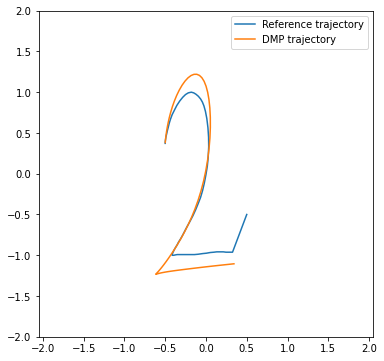

In [74]:
# plot
plt.figure(figsize=(6, 6))

plt.plot(path1, path2, label="Reference trajectory")
plt.plot(y1, y2, label="DMP trajectory")

plt.axis('equal')
plt.xlim([path1.min()*2, path1.max()*2])
plt.ylim([path2.min()*2, path2.max()*2])
plt.legend()
plt.show()

0.33333333333333337